In [193]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
%matplotlib inline

In [194]:
df = pd.read_csv('hr_data.csv')

In [195]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [196]:
df = df.rename(columns={'satisfaction_level': 'satisf_lvl',
                        'last_evaluation': 'last_eval',
                        'number_project': 'num_proj',
                        'average_montly_hours': 'avg_hours',
                        'time_spend_company': 'comp_exp',
                        'Work_accident': 'accidents',
                        'promotion_last_5years': 'promotion',
                        'Department': 'department'})

In [197]:
df.head()

,satisf_lvl,last_eval,num_proj,avg_hours,comp_exp,accidents,left,promotion,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [198]:
df.shape

(14999, 10)

In [199]:
df[df.left == 1].shape

(3571, 10)

In [200]:
df[df.left == 0].shape

(11428, 10)

In [201]:
df.groupby('left').mean()

,satisf_lvl,last_eval,num_proj,avg_hours,comp_exp,accidents,promotion
left,,,,,,,
0,0.666810,0.715473,3.786664,199.060203,3.380032,0.175009,0.026251
1,0.440098,0.718113,3.855503,207.419210,3.876505,0.047326,0.005321


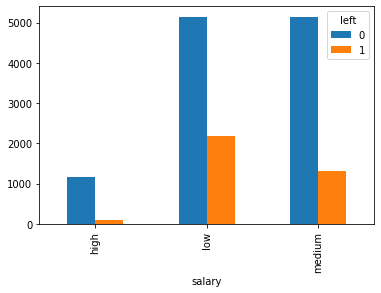

In [202]:
pd.crosstab(df.salary,df.left).plot(kind='bar');

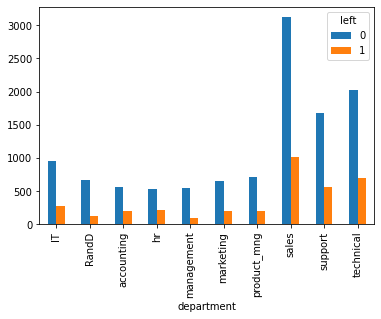

In [203]:
pd.crosstab(df.department,df.left).plot(kind='bar');

In [204]:
df1 = df[['satisf_lvl', 'avg_hours', 'promotion', 'salary', 'accidents']]
df1.head()

,satisf_lvl,avg_hours,promotion,salary,accidents
0,0.38,157,0,low,0
1,0.80,262,0,medium,0
2,0.11,272,0,medium,0
3,0.72,223,0,low,0
4,0.37,159,0,low,0


In [205]:
dummies = pd.get_dummies(df1.salary).drop(columns=['medium'])
dummies.head()

,high,low
0,0,1
1,0,0
2,0,0
3,0,1
4,0,1


In [206]:
X = pd.concat([df1.drop(columns=['salary']), dummies], axis='columns')
y = df.left
X.head()

,satisf_lvl,avg_hours,promotion,accidents,high,low
0,0.38,157,0,0,0,1
1,0.80,262,0,0,0,0
2,0.11,272,0,0,0,0
3,0.72,223,0,0,0,1
4,0.37,159,0,0,0,1


In [207]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
model = LogisticRegression()

In [208]:
model.fit(X_train, y_train)

LogisticRegression()

In [209]:
model.predict(X_test)

array([0, 0, 1, ..., 1, 0, 1], dtype=int64)

In [210]:
model.score(X_test, y_test)

0.782

In [ ]:
model.predict_proba(X)